In [37]:
import pandas as pd
import random as random
import numpy as np 
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
col = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Embarked']

In [40]:
model =[]
def trainModel(c):
    probability = data.Survived.eq(1).groupby(data[c]).mean()
    model.append(probability)
    return
for c in col:
    trainModel(c)
print(model)

[Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64, Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64, Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64, SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64, Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64, Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64]


In [56]:
def trainDataPredict (threshold):
    false_Data=0
    tt=0
    for index,row in data.iterrows():
        p=0
        t=0
        for i in range(6):
            column=col[i]
            for c,pred in model[i].iteritems():
                t+=pred
                if(row[column]==c):
                    p+=pred
        false_Data+=1 if (1 if p>threshold else 0)==row.Survived else 0
        tt+=1
    accuracy=false_Data/tt
#     print(f"Threshold :{threshold} - Accuracy : {accuracy}")
    return accuracy


In [57]:
thresholds = np.arange(1,3,0.01)
maxAccuracyThreshold = 0
maxAccuracy = 0
accuracys = []
for i in range(0,len(thresholds)):
    temp = trainDataPredict(thresholds[i])
    accuracys.append(temp)
    if maxAccuracy < temp:
        maxAccuracy = temp
        maxAccuracyThreshold = thresholds[i]
print(f"Threshold :{maxAccuracyThreshold} - Accuracy : {maxAccuracy}")   
    

Threshold :2.5600000000000014 - Accuracy : 0.8114478114478114


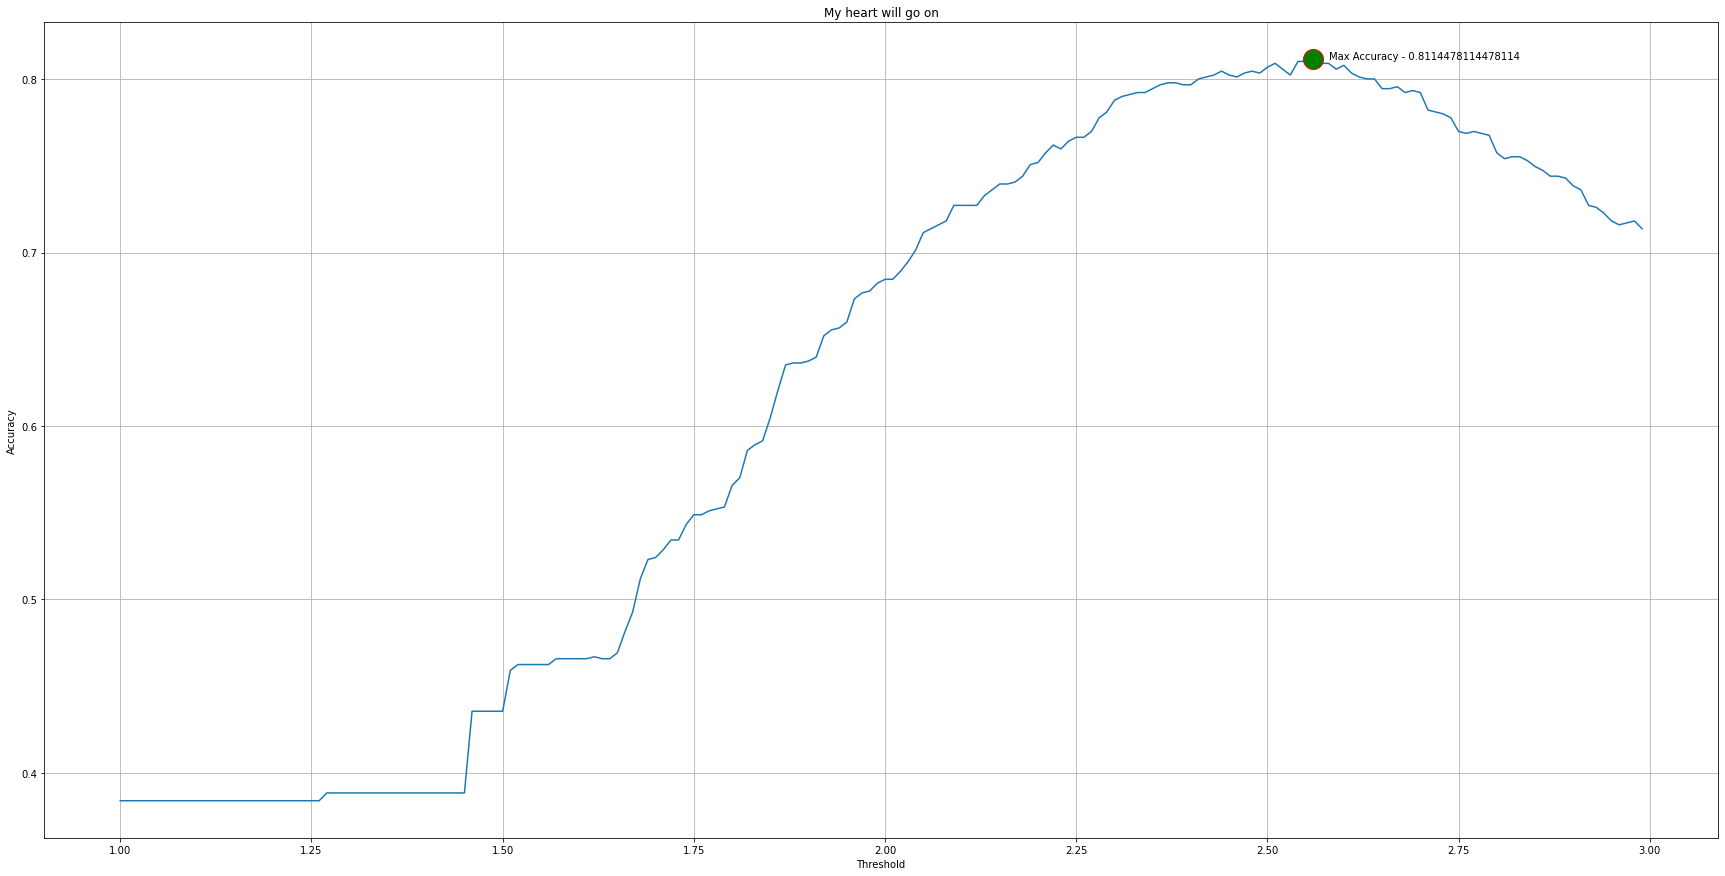

In [58]:
plt.figure(figsize=(30, 15))
plt.plot(thresholds,accuracys)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('My heart will go on')
plt.yticks(np.arange(0,1.1,0.1))
plt.plot(maxAccuracyThreshold, maxAccuracy, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.annotate(f"Max Accuracy - {maxAccuracy}", (maxAccuracyThreshold+.02, maxAccuracy))
plt.grid('on')

In [67]:
def testPredict (threshold):
    prediction=[]
    false_Data=0
    tt=0
    for index,row in test.iterrows():
        p=0
        t=0
        for i in range(6):
            column=col[i]
            for c,pred in model[i].iteritems():
                t+=pred
                if(row[column]==c):
                    p+=pred
        prediction.append(1 if p>threshold else 0)
        tt+=1
    return prediction
prediction = testPredict(maxAccuracyThreshold) # Accuracy 0.76555

In [68]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction})
output.to_csv('./Data/submission.csv', index=False)